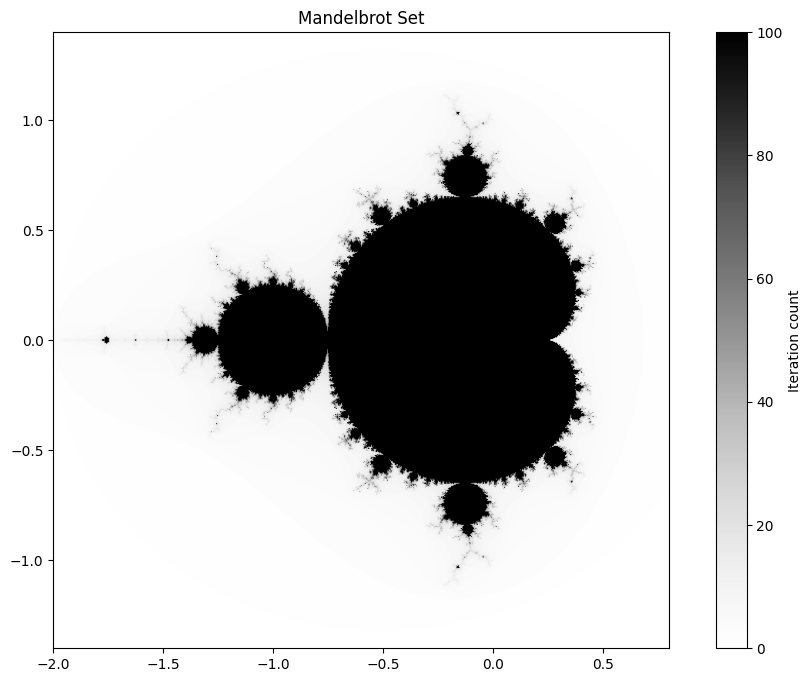

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(h, w, max_iter):
    """
    Generate the Mandelbrot set.
    
    Parameters:
    h (int): Height of the image
    w (int): Width of the image
    max_iter (int): Maximum number of iterations
    
    Returns:
    numpy.ndarray: Array containing the iteration counts
    """
    y, x = np.ogrid[-1.4:1.4:h*1j, -2:0.8:w*1j]
    c = x + y*1j
    z = c
    divtime = max_iter + np.zeros(z.shape, dtype=int)
    
    for i in range(max_iter):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2
        div_now = diverge & (divtime == max_iter)
        divtime[div_now] = i
        z[diverge] = 2
        
    return divtime

# Example usage
width, height = 800, 600
max_iterations = 100

# Generate the Mandelbrot set
mandel = mandelbrot(height, width, max_iterations)

# Plot the result
plt.figure(figsize=(12, 8))
plt.imshow(mandel, cmap='Greys', extent=[-2, 0.8, -1.4, 1.4])
plt.title('Mandelbrot Set')
plt.colorbar(label='Iteration count')
plt.show()

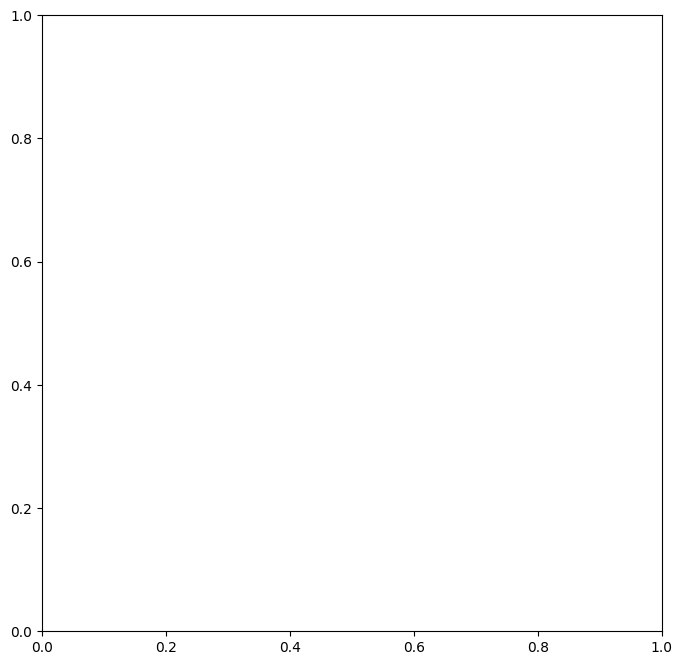

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def mandelbrot_zoom(h, w, max_iter, center, zoom_width):
    """
    Generate the Mandelbrot set for a specific zoom level.
    """
    y, x = np.ogrid[
        center.imag - zoom_width/2:center.imag + zoom_width/2:h*1j,
        center.real - zoom_width:center.real + zoom_width:w*1j
    ]
    c = x + y*1j
    z = c
    divtime = max_iter + np.zeros(z.shape, dtype=int)
    
    for i in range(max_iter):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2
        div_now = diverge & (divtime == max_iter)
        divtime[div_now] = i
        z[diverge] = 2
        
    return divtime

# Animation parameters
width, height = 500, 500
max_iterations = 200  # Increased for more detail
n_frames = 250  # More frames for smoother zoom
zoom_factor = 0.95  # Slower zoom for better detail

# Target point on the boundary
target = -0.7435 + 0.1314j  # Elephant valley point

# Initialize the plot
fig, ax = plt.figure(figsize=(8, 8)), plt.axes()
initial_width = 2.0
zoom_widths = initial_width * (zoom_factor ** np.arange(n_frames))

def animate(frame):
    ax.clear()
    zoom_width = zoom_widths[frame]
    mandel = mandelbrot_zoom(height, width, max_iterations, target, zoom_width)
    ax.imshow(mandel, cmap='magma', extent=[  # Changed colormap to 'magma' for better boundary visibility
        target.real - zoom_width, 
        target.real + zoom_width,
        target.imag - zoom_width/2, 
        target.imag + zoom_width/2
    ])
    ax.set_title(f'Zoom level: {1/zoom_width:.2f}x')

anim = FuncAnimation(fig, animate, frames=n_frames, interval=50)
plt.show()

# Optional: Save animation
anim.save('mandelbrot_boundary_zoom.gif', writer='pillow')

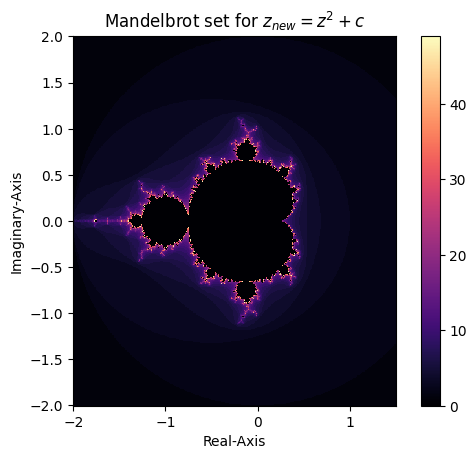

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# setting parameters (these values can be changed)
xDomain, yDomain = np.linspace(-2,1.5,500), np.linspace(-2,2,500)
bound = 2
power = 2             # any positive floating point value
max_iterations = 50   # any positive integer value
colormap = 'magma'    # set to any matplotlib valid colormap


# computing 2-d array to represent the mandelbrot-set
iterationArray = []
for y in yDomain:
    row = []
    for x in xDomain:
        c = complex(x,y)
        z = 0
        for iterationNumber in range(max_iterations):
            if(abs(z) >= bound):
                row.append(iterationNumber)
                break
            else: z = z**power + c
        else:
            row.append(0)

    iterationArray.append(row)

# plotting the data
ax = plt.axes()
#plt.rc('text', usetex = True)   # uncomment this line to enable use of tex when LaTeX is installed
ax.set_aspect('equal')
graph = ax.pcolormesh(xDomain, yDomain, iterationArray, cmap = colormap)
plt.colorbar(graph)
plt.xlabel("Real-Axis")
plt.ylabel("Imaginary-Axis")
plt.title('Mandelbrot set for $z_{{new}} = z^{{{}}} + c$'.format(power))
plt.show()

In [ ]:
def pixel_to_complex(x, y, width, height, x_min, x_max, y_min, y_max):
    """
    Convert pixel coordinates to a complex number in the Mandelbrot set.

    Parameters:
    x, y (int): Pixel coordinates
    width, height (int): Dimensions of the image
    x_min, x_max, y_min, y_max (float): Extent of the complex plane

    Returns:
    complex: Corresponding complex number
    """
    real = x_min + (x / width) * (x_max - x_min)
    imag = y_min + (y / height) * (y_max - y_min)
    return complex(real, imag)

In [ ]:
def plot_mandelbrot(center, zoom, width, height, max_iter):
    """
    Plot the Mandelbrot set for a given center and zoom level.

    Parameters:
    center (complex): Center of the view in the complex plane
    zoom (float): Zoom level
    width, height (int): Dimensions of the image
    max_iter (int): Maximum number of iterations
    """
    x_min, x_max = center.real - zoom, center.real + zoom
    y_min, y_max = center.imag - zoom/2, center.imag + zoom/2
    mandel = mandelbrot_zoom(height, width, max_iter, center, zoom)
    plt.imshow(mandel, cmap='magma', extent=[x_min, x_max, y_min, y_max])
    plt.colorbar(label='Iteration count')
    plt.title(f'Mandelbrot Set at {center} with zoom {zoom}')
    plt.show()

In [ ]:
def compare_images(input_image, center, zoom, width, height, max_iter):
    """
    Compare an input image with a generated Mandelbrot set.

    Parameters:
    input_image (numpy.ndarray): The input image to compare
    center (complex): Center of the view in the complex plane
    zoom (float): Zoom level
    width, height (int): Dimensions of the image
    max_iter (int): Maximum number of iterations
    """
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot input image
    axes[0].imshow(input_image, cmap='magma')
    axes[0].set_title('Input Image')
    
    # Plot generated Mandelbrot set
    x_min, x_max = center.real - zoom, center.real + zoom
    y_min, y_max = center.imag - zoom/2, center.imag + zoom/2
    mandel = mandelbrot_zoom(height, width, max_iter, center, zoom)
    axes[1].imshow(mandel, cmap='magma', extent=[x_min, x_max, y_min, y_max])
    axes[1].set_title('Generated Mandelbrot Set')
    
    plt.show()